# Template : Tensorflow - Time Series Problems

## Step 1 : Libraries

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import BatchNormalization

### Tensorboard Related

In [35]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [37]:
# %rmdir /Q /S logs

In [32]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir logs/fit (started 4:07:35 ago; pid 10220)
  - port 6006: logdir logs (started 2 days, 17:10:49 ago; pid 11508)
  - port 6006: logdir logs (started 0:00:52 ago; pid 7708)


In [34]:
%tensorboard --port=6786 --logdir logs

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 13980.

In [ ]:
# notebook.display(port=6786, height=1000)

## Step 2 : Load Dataset

In [3]:
filename = 'D:\\Sandbox\\Github\\Data\\Frozen_Dessert_Production.csv'

In [4]:
df = pd.read_csv(filename, index_col='DATE', parse_dates=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [6]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [7]:
# rename column
df.columns = ['Production']

In [8]:
df.info

<bound method DataFrame.info of             Production
DATE                  
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
...                ...
2019-05-01    114.5613
2019-06-01    124.9605
2019-07-01    110.2632
2019-08-01    102.6085
2019-09-01    101.5866

[573 rows x 1 columns]>

In [9]:
df.tail()

,Production
DATE,
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632
2019-08-01,102.6085
2019-09-01,101.5866


<AxesSubplot:xlabel='DATE'>

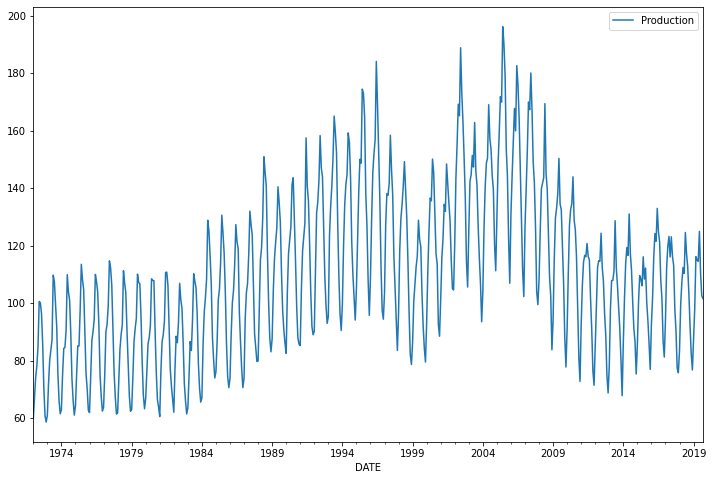

In [10]:
df.plot(figsize=(12,8))

## Step 3 : Train Test Split

In [11]:
# Please modify based on the problem  : # Here no of months for test
# time interval is based on months. using 2 years for TEST dataset
test_size = 24

train = df[:-test_size]    # 24 months for test and rest for training data split 
test  = df[-test_size:]

In [12]:
# Another way to do it without negative slicing. But above code is simpler
# test_ind = len(df) - test_size
# train = df[:test_ind]  
# test  = df[test_ind:]

In [41]:
print(f"Size of dataset in months: {len(df)}")
print(f"Size of test in months   : {len(train)}") 
print(f"Size of train in months  : {len(train)}") 

Size of dataset in months: 573
Size of test in months   : 549
Size of train in months  : 549


## Step 4 : Normalization

In [14]:
scaler = MinMaxScaler()

scaler.fit(train)

train = scaler.transform(train)
test = scaler.transform(test)

MinMaxScaler()

## Step 5 : Time Series Generator

In [15]:
# Please modify based on the problem : 
# Note n_features should be < size of test . Here size of test = 24 so use 18
n_features = 1     # only one value in the series (multivariate > 1)
n_input    = 18    # no of months as time step interval for the time series
batch_size = 1     # what is the batch here?

In [16]:
train_generator = TimeseriesGenerator(train, 
                                      train, 
                                      length = n_input, 
                                      batch_size = batch_size,
                                      shuffle = True)

In [17]:
# Shuffle is not needed b/c model will not see this data.
validation_generator = TimeseriesGenerator(test,
                                           test, 
                                           length = n_input, 
                                           batch_size = batch_size)

## Step 6 : Model

In [18]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

def fit_model_and_show_results (model):

  time_stamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S") 
  log_dir = "logs/fit/"+ model_name + "_" + time_stamp

  tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
    
  model.summary()

  early_stop = EarlyStopping(monitor ='val_loss', patience = 50)
  history = model.fit(train_generator, 
                      epochs = epochs, 
                      validation_data = validation_generator, 
                      callbacks = [early_stop, tensorboard_callback],
                      verbose = 1)
  plot_graphs(history, "loss")
  #plot_graphs(history, "accuracy")    
    
    
      
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
  model.summary()
  history = model.fit(train_generator, epochs = epochs, verbose = 1, callbacks=[tensorboard_callback])
  plot_graphs(history, "loss")

In [19]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 10220), started 3:00:06 ago. (Use '!kill 10220' to kill it.)

### Simple RNN

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
  1/531 [..............................] - ETA: 0s - loss: 0.3261WARNING:tensorflow:From C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
531/531 [==============================] - 2s 4ms/step - loss: 0.0233 - val_loss: 0.0053
Epoch 2/100
531/531 [==============================] - 2s 3ms/step - loss: 0.0129 - val_loss: 0.0033
Epoch 3/100
531/531 [==============================] - 2s 5ms/step - loss: 0.0110 - val_loss: 0.0041

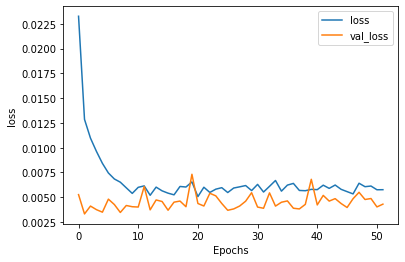

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
531/531 [==============================] - 2s 3ms/step - loss: 0.0057
Epoch 2/100
531/531 [==============================] - 1s 3ms/step - loss: 0.0058
Epoch 3/100
531/531 [==============================] - 1s 3ms/step - loss: 0.0054
Epoch 4/100
531/531 [==============================] - 1s 3ms/step - loss: 0.0053
Epoch 5/100
531/531 [==============================] - 1s 3ms/step - loss: 0.0054
Epoch 6/100
531/531 [==============================] - 1s 3ms/step - loss: 0.0056
Epoch 7/100
531/531 [==============================] - 2s 3ms/step - loss: 0.0054
Epoch 8/100
531/531 [==============================] - 1s 3ms/step - loss: 0.0063


KeyError: 'val_loss'

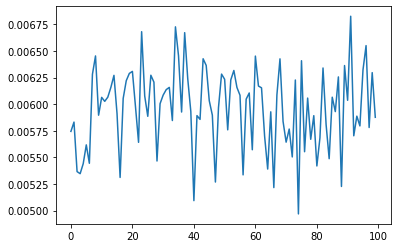

In [20]:
epochs = 100
model_name = "rnn"

model_rnn = Sequential()
model_rnn.add(SimpleRNN(1, input_shape=(n_input, n_features)))

optimizer = tf.keras.optimizers.Adam(lr=0.005)
model_rnn.compile(loss="mse", optimizer=optimizer)
fit_model_and_show_results(model_rnn)

### Deep RNN

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 18, 100)           10200     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 18, 100)           20100     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 1)                 102       
Total params: 30,402
Trainable params: 30,402
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
531/531 [==============================] - 8s 15ms/step - loss: 0.1061 - val_loss: 0.0048
Epoch 2/100
531/531 [==============================] - 8s 15ms/step - loss: 0.0467 - val_loss: 0.0057
Epoch 3/100
531/531 [==============================] - 6s 10ms/step - loss: 0.0485 - val_loss: 0.0703
Epoch 4/100
531/531 [==============================] - 5s 10ms/step - loss

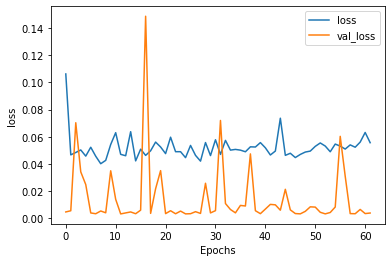

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 18, 100)           10200     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 18, 100)           20100     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 1)                 102       
Total params: 30,402
Trainable params: 30,402
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
531/531 [==============================] - 5s 10ms/step - loss: 0.0466
Epoch 2/100
531/531 [==============================] - 5s 9ms/step - loss: 0.0527
Epoch 3/100
531/531 [==============================] - 5s 9ms/step - loss: 0.0572
Epoch 4/100
531/531 [==============================] - 4s 8ms/step - loss: 0.0513
Epoch 5/100
531/531 [==============================

KeyError: 'val_loss'

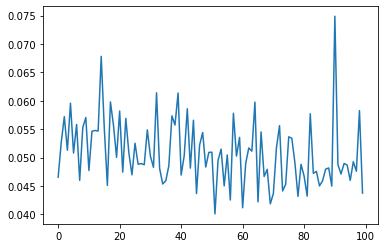

In [21]:
epochs = 100

model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(100, return_sequences=True, 
                    input_shape=(n_input, n_features)))
model_deep_rnn.add(SimpleRNN(100, return_sequences=True))
model_deep_rnn.add(SimpleRNN(1))

model_deep_rnn.compile(loss="mse", optimizer=optimizer)
fit_model_and_show_results(model_deep_rnn)

### RNN with Batch Norm

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 18, 100)           10200     
_________________________________________________________________
batch_normalization (BatchNo (None, 18, 100)           400       
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 18, 100)           20100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 18, 100)           400       
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 1)                 102       
Total params: 31,202
Trainable params: 30,802
Non-trainable params: 400
_________________________________________________________________
Epoch 1/100
531/531 [==============================] - 8s 14ms/step - loss: 0.1525 - val_loss: 0.0213
Epoch 2/100


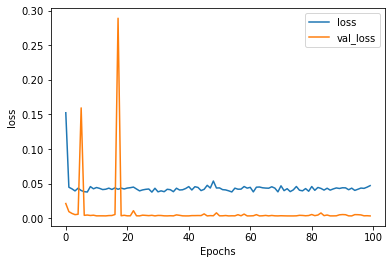

In [25]:
epochs = 100

model_rnn_n = Sequential()
model_rnn_n.add(SimpleRNN(100, return_sequences=True, 
                          input_shape=(n_input, n_features)))
model_rnn_n.add(BatchNormalization())
model_rnn_n.add(SimpleRNN(100, return_sequences=True))
model_rnn_n.add(BatchNormalization())
model_rnn_n.add(SimpleRNN(1))

model_rnn_n.compile(loss="mse", optimizer=optimizer)
fit_model_and_show_results(model_rnn_n)

### LSTM

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
531/531 [==============================] - 4s 8ms/step - loss: 0.0237 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 2/100
531/531 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.00 - 4s 7ms/step - loss: 0.0068 - accuracy: 0.0019 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 3/100
531/531 [==============================] - 4s 7ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 4/100
531/531 [

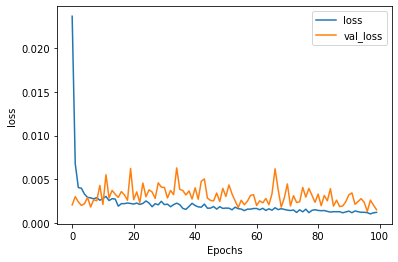

In [26]:
model_lstm = Sequential()

model_lstm.add(LSTM(100, 
               activation='relu', 
               input_shape=(n_input, n_features)))

model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mse', metrics = ['accuracy'])  
fit_model_and_show_results(model_lstm)

### GRU

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 18, 100)           30900     
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               60600     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 91,601
Trainable params: 91,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
531/531 [==============================] - 7s 14ms/step - loss: 0.0197 - val_loss: 0.0064
Epoch 2/100
531/531 [==============================] - 8s 15ms/step - loss: 0.0060 - val_loss: 0.0056
Epoch 3/100
531/531 [==============================] - 8s 15ms/step - loss: 0.0049 - val_loss: 0.0053
Epoch 4/100
531/531 [==============================] - 7s 13ms/step - loss

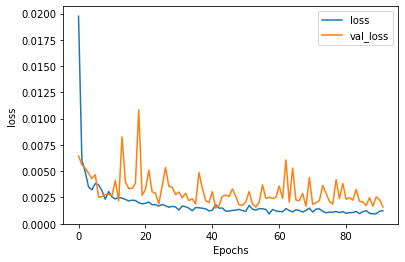

In [27]:
epochs = 100

model_gru = Sequential()

model_gru.add(GRU(100, return_sequences=True,
                  activation='relu', 
                  input_shape=(n_input, n_features)))

model_gru.add(GRU(100, activation='relu'))

model_gru.add(Dense(1))

model_gru.compile(optimizer='adam', loss='mse')

fit_model_and_show_results(model_gru)

### CNN

In [28]:
epochs = 100

model_cnn = Sequential()

model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', 
                     input_shape=((n_input, n_features))))
	
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(100, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))
#model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

fit_model_and_show_results(model_cnn, "cnn")    

ValueError: Negative dimension size caused by subtracting 50 from 18 for '{{node conv1d/conv1d}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](conv1d/conv1d/ExpandDims, conv1d/conv1d/ExpandDims_1)' with input shapes: [?,1,18,1], [1,50,1,100].

### CNN with GRU

In [ ]:
epochs = 100

model_cnn_gru = Sequential()

model_cnn_gru.add(Conv1D(filters = 200, kernel_size = 100, padding="valid",
          input_shape=(n_input, n_features)))

model_cnn_gru.add(GRU(200, return_sequences=True))

model_cnn_gru.add(GRU(200, activation='relu'))

model_cnn_gru.add(Dense(1))

model_cnn_gru.compile(optimizer='adam', loss='mse')

fit_model_and_show_results(model_cnn_gru)

In [ ]:
model = model_lstm

## Step 7 : Seed

In [24]:
# Set the seed value to grow the prediction

batch = train[-n_input:].reshape((1, n_input, n_features))   # seed stepping stone value

## Step 8 : Prediction

In [25]:
train_pred_list = []

# Predict using loop

for i in range(n_input):   
    train_pred_list.append(model.predict(batch)[0])                # predict and save in list
    batch = np.append(batch[:,1:,:],[[train_pred_list[i]]],axis=1) # set next value for prediction

In [26]:
# Set the seed value to grow the prediction for test set

batch = test[-n_input:].reshape((1, n_input, n_features))   # stepping stone value

test_pred_list = []

# Predict using loop

for i in range(n_input):   
    test_pred_list.append(model.predict(batch)[0])                # predict and save in list
    batch = np.append(batch[:,1:,:],[[test_pred_list[i]]],axis=1) # set next value for prediction

In [27]:
# We have done Predictions for these date times
df[-n_input:].index   # for the past 18 months

DatetimeIndex(['2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [28]:
df_predict = pd.DataFrame(scaler.inverse_transform(train_pred_list),
                          index=df[-n_input:].index, 
                          columns=['Prediction'])

In [29]:
df_predict

,Prediction
DATE,
2018-04-01,85.374660
2018-05-01,75.878778
2018-06-01,73.185733
2018-07-01,90.101401
2018-08-01,105.114605
2018-09-01,112.794720
2018-10-01,115.325223
2018-11-01,121.197939
2018-12-01,125.908616


## Step 9 : Prediction + Actual

In [30]:
df_test = pd.concat([df,df_predict], axis=1)

In [31]:
# Just to do sanity check that there is no prediction beyond our test window
df_test[-20:]

,Production,Prediction
DATE,,
2018-02-01,99.4899,NaN
2018-03-01,107.3152,NaN
2018-04-01,112.4309,85.374660
2018-05-01,110.3544,75.878778
2018-06-01,124.5841,73.185733
2018-07-01,117.2215,90.101401
2018-08-01,112.6779,105.114605
2018-09-01,103.3118,112.794720
2018-10-01,92.1321,115.325223


## Step 10 : Evaluation

In [48]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

test_errors = {}

test_errors ['MAX_Error'] = max_error(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
test_errors ['MAE'] = mean_absolute_error(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
test_errors ['RMSE'] = mean_squared_error(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]], squared=False)
test_errors ['MSE'] = mean_squared_error(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]], squared=True)

pd.Series(test_errors)

pd.DataFrame(losses).tail(1)

MAX_Error      55.803796
MAE            27.923756
RMSE           32.192065
MSE          1036.329056
dtype: float64

,loss,accuracy,val_loss,val_accuracy
72,0.001362,0.0,0.002759,0.0


,loss,accuracy,val_loss,val_accuracy
68,0.001386,0.001883,0.005143,0.0
69,0.001389,0.001883,0.003093,0.0
70,0.001274,0.000000,0.003463,0.0
71,0.001476,0.001883,0.002463,0.0
72,0.001362,0.000000,0.002759,0.0


## Step 11 : Plot

<AxesSubplot:xlabel='DATE'>

<Figure size 864x720 with 0 Axes>

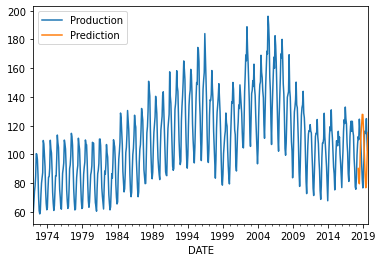

In [31]:
plt.figure(figsize=(12, 10))
df_test.plot()

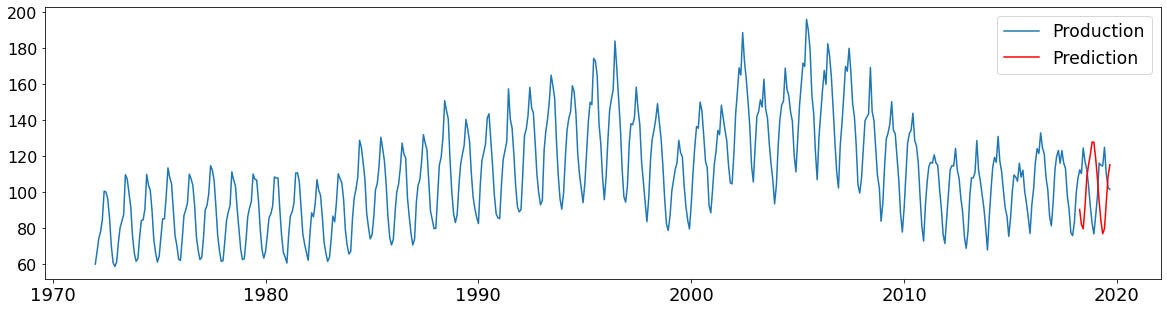

In [32]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['Production'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(["Production", "Prediction"], loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

## Step 12 : Future Forecasting

In [33]:
future_months = 12

pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(future_months):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],
                      [[pred_list[i]]],
                      axis=1)

In [34]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0, future_months+1) ]
future_dates = pd.DataFrame(index=add_dates[1:],
                            columns=df.columns)

In [35]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-future_months:].index, 
                          columns=['Prediction'])

In [36]:
df_projected = pd.concat([df,df_predict], axis=1)

<AxesSubplot:>

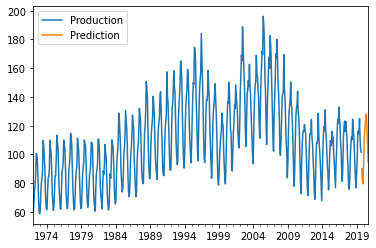

In [37]:
df_projected.plot()

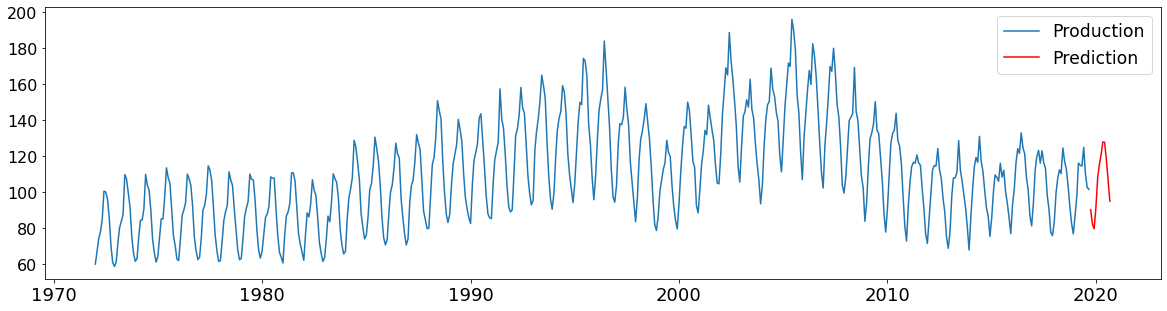

In [38]:
plt.figure(figsize=(20, 5))
plt.plot(df_projected.index, df_projected['Production'])
plt.plot(df_projected.index, df_projected['Prediction'], color='r')
plt.legend(["Production", "Prediction"], loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

## Conclusion :